In [2]:
# https://medium.com/@esrasoylu/creating-a-cnn-model-for-image-classification-with-tensorflow-49b84be8c12a

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.layers import Input
import matplotlib.pyplot as plt

# Enable Nvidia GPUs by un-commenting this line 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#XLA_FLAGS="--xla_gpu_cuda_data_dir=/usr/lib/cuda/nvvm/libdevice"
XLA_FLAGS="--xla_gpu_cuda_data_dir=/home/metzgeka/tensorflow/lib/python3.12/site-packages/nvidia/cuda_nvcc"
#export XLA_FLAGS=--xla_gpu_cuda_data_dir=/home/metzgeka/tensorflow/lib/python3.12/site-packages/nvidia/cuda_nvcc

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

# To get reproducable results with the same training setting random seed
SEED = 42
np.random.seed(SEED)

2025-01-12 15:37:18.809652: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-12 15:37:18.842953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-12 15:37:19.348710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [3]:
ytest=ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

NameError: name 'train_images' is not defined

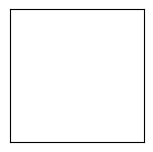

In [ ]:
classname=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def example(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index]) 
    plt.xlabel(classname[y[index]])

#x: Dataset containing the images.
#y: Dataset containing the labels. Specifies the class of each image.
#index: Specify the index of the data point to be visualized

Dims (10000, 32, 32, 3)


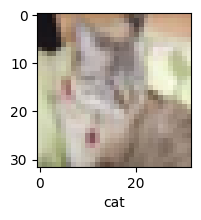

In [6]:
example(xtest,ytest,8)
print("Dims", xtest.shape)

In [7]:
xtrain=xtrain/255
xtest=xtest/255

In [8]:
model = models.Sequential([
    Input(shape=(32,32,3)),  # InputLayer'ı buraya ekleyin
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2025-01-12 15:27:37.460513: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-12 15:27:37.482594: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-12 15:27:37.482719: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
history=model.fit(xtrain,
                  ytrain,
                  epochs=30,
                  validation_data=(xtest,ytest))

Epoch 1/30


I0000 00:00:1736692059.468770   20937 service.cc:145] XLA service 0x74518c015270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736692059.468804   20937 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2025-01-12 15:27:39.484880: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-12 15:27:39.567529: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902


 103/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1613 - loss: 2.2122

I0000 00:00:1736692060.626273   20937 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3967 - loss: 1.6630 - val_accuracy: 0.5778 - val_loss: 1.1781
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6011 - loss: 1.1310 - val_accuracy: 0.6372 - val_loss: 1.0442
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6558 - loss: 0.9889 - val_accuracy: 0.6564 - val_loss: 0.9831
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6924 - loss: 0.8885 - val_accuracy: 0.6633 - val_loss: 0.9881
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7189 - loss: 0.8176 - val_accuracy: 0.6569 - val_loss: 0.9888
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7378 - loss: 0.7587 - val_accuracy: 0.6925 - val_loss: 0.9075
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7553 - loss: 0.7072 - val_accuracy: 0.6983 - val_loss: 0.8937
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7718 - loss: 0.6534 - val_accurac

In [11]:
loss,acc= model.evaluate(xtest,ytest,verbose=False)

Text(0.5, 1.0, 'Training and Test Performance Graph')

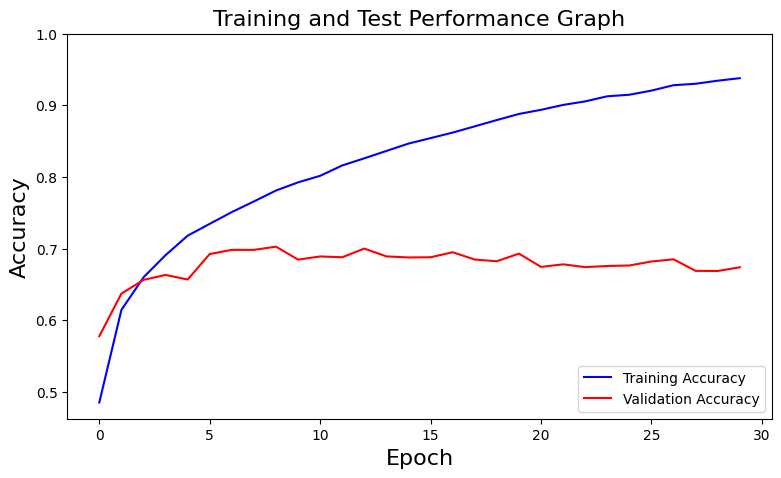

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = "b",label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize= 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Performance Graph", fontsize = 16)

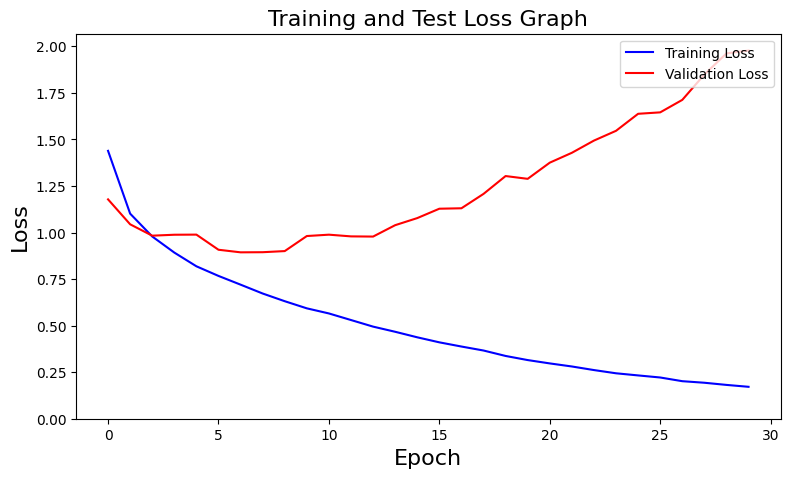

In [13]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color= "b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc= "upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test Loss Graph",fontsize= 16)
plt.show()

In [14]:
ypred=model.predict(xtest)
ypred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.1565832e-07, 5.2947428e-15, 6.5852248e-09, 9.9916565e-01,
        1.1267991e-09, 3.6638547e-04, 4.6775895e-04, 1.4869809e-16,
        7.0065903e-10, 3.7592040e-13],
       [1.5516322e-09, 6.6184724e-10, 8.7417616e-19, 8.7965508e-20,
        1.7928173e-33, 5.4989716e-19, 7.1405862e-20, 5.0870280e-30,
        1.0000000e+00, 7.1859537e-18],
       [2.6803800e-01, 1.3598104e-03, 5.2483389e-05, 1.4621390e-03,
        9.2816514e-08, 4.7063016e-04, 1.3659321e-04, 7.5742610e-05,
        7.0437402e-01, 2.4030419e-02]], dtype=float32)

In [15]:
ypred1=[np.argmax(element) for element in ypred]
ypred1[:3]

[3, 8, 8]

In [16]:
# True classes
y_true = [3, 8, 8, 0]

# Predicted classes
ypred1 = [3, 8, 1, 0]

# Printing the true and predicted classes
for true, pred in zip(y_true, ypred1):
    print("True Class:", classname[true], "\tPredicted Class:", classname[pred])

True Class: cat 	Predicted Class: cat
True Class: ship 	Predicted Class: ship
True Class: ship 	Predicted Class: automobile
True Class: airplane 	Predicted Class: airplane
